### Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


## Step 1 : Import Dependience

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [12]:
#loading the data
loan_data = pd.read_csv("C:/Users/mansi/LM/Project/loan/train.csv")

## Step 2: Data Analysis

In [13]:
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [14]:
loan_data.shape

(614, 13)

In [15]:
loan_data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [16]:
# to check the missing value
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Dropping the missing value
loan_data = loan_data.dropna()

In [19]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
loan_data.shape

(480, 13)

### Step 3: Label encoding

In [21]:
loan_data.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [22]:
loan_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1

In [24]:
# dependent column values
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [25]:
# replacing 3+ to 4
loan_data = loan_data.replace(to_replace = '3+', value=4)

In [26]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

### Step 4 : Data Visualization

<Axes: xlabel='Education', ylabel='count'>

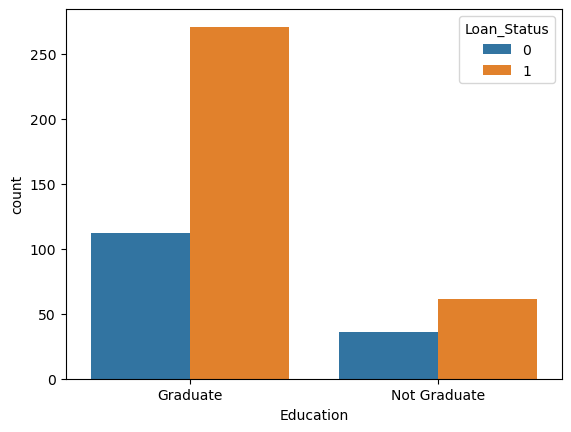

In [28]:
sns.countplot(data = loan_data, x = 'Education', hue ='Loan_Status')

From the visualization, we can observe that individuals who are graduates have a higher likelihood of being granted a loan by the company,
whereas those who are not graduates have significantly lower chances of loan approval.

<Axes: xlabel='Married', ylabel='count'>

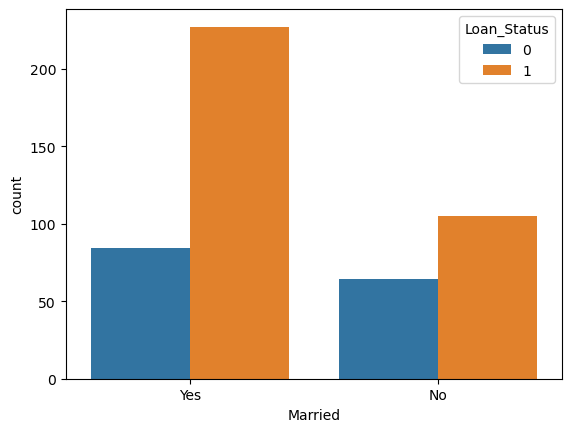

In [29]:
sns.countplot(x ='Married' , hue='Loan_Status', data = loan_data)

This visualization indicates that married individuals have a higher chance of loan approval,
whereas unmarried individuals are less likely to have their loan approved

<Axes: xlabel='Gender', ylabel='count'>

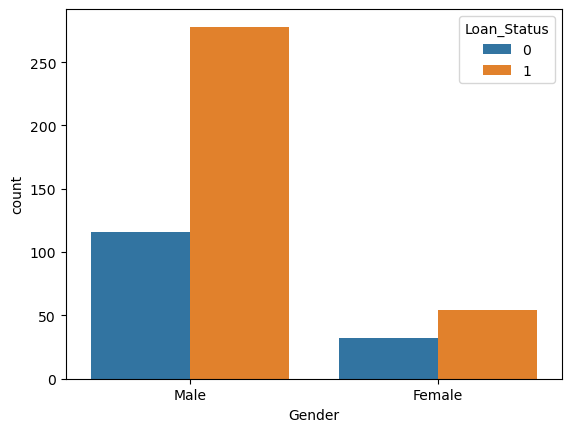

In [30]:
sns.countplot(x ='Gender' , hue='Loan_Status', data = loan_data)

In this observation we can clearly see that the Male applicant have higher chance of getting the loan approval compared to the Female applicant. 

<Axes: xlabel='Self_Employed', ylabel='count'>

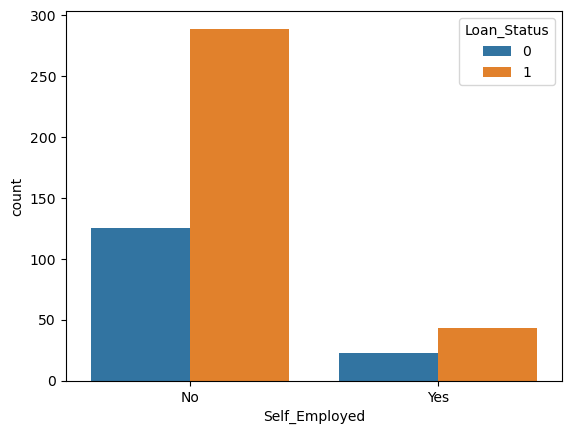

In [31]:
sns.countplot(x ='Self_Employed' , hue='Loan_Status', data = loan_data)

This observation clearly shows that individuals who are not self-employed have a higher chance of loan approval compared to self-employed applicants.

In [35]:
# replcaing categorical column we numerical 

loan_data.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':1, 'Female':0} , 
                   'Education':{'Graduate':1, 'Not Graduate': 0} , 'Self_Employed':{'No' : 0 , 'Yes' : 1},
                   'Property_Area' : {'Urban':2, 'Semiurban' : 1 , 'Rural' : 0}} , inplace = True)

In [45]:
loan_data.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   
5  LP001011       1        1          2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1  
5             1.0              2            1

In [50]:
# separting the data & label
X = loan_data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_data['Loan_Status']

In [51]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

### Step 5 : Splitting the data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, stratify=Y, random_state=2
)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Step 6 :  Model Development

In [56]:
classifier = svm.SVC(kernel = 'linear')

In [57]:
# traning the support vector machine
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [60]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accurarcy = accuracy_score(X_train_prediction, Y_train)

In [62]:
print("Accuracy on training data: ", training_data_accurarcy)

Accuracy on training data:  0.7986111111111112


In [63]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accurarcy = accuracy_score(X_test_prediction, Y_test)

In [64]:
print("Accuracy on test data: ", test_data_accurarcy)

Accuracy on test data:  0.8333333333333334
